In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
import statistics

In [83]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [84]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [86]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [87]:
df.shape

(398, 9)

In [88]:
#data cleaning and exploratory data analysis

In [89]:
print("Null values in each of the columns in the dataset:\n")
print(df.isna().sum())

Null values in each of the columns in the dataset:

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [90]:
#removing unnecessary columns
print("The only unnecessary column is: car name")

The only unnecessary column is: car name


In [91]:
df1 = df.drop(columns = ["car name"])
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [92]:
# There are non digit entries in the horsepower column
notDigitHP = [i for i in df["horsepower"] if not i.isdigit()]
notDigitHP

['?', '?', '?', '?', '?', '?']

In [93]:
digitHP = [int(i) if i.isdigit() else None for i in df["horsepower"]]
digitHP

[130,
 165,
 150,
 150,
 140,
 198,
 220,
 215,
 225,
 190,
 170,
 160,
 150,
 225,
 95,
 95,
 97,
 85,
 88,
 46,
 87,
 90,
 95,
 113,
 90,
 215,
 200,
 210,
 193,
 88,
 90,
 95,
 None,
 100,
 105,
 100,
 88,
 100,
 165,
 175,
 153,
 150,
 180,
 170,
 175,
 110,
 72,
 100,
 88,
 86,
 90,
 70,
 76,
 65,
 69,
 60,
 70,
 95,
 80,
 54,
 90,
 86,
 165,
 175,
 150,
 153,
 150,
 208,
 155,
 160,
 190,
 97,
 150,
 130,
 140,
 150,
 112,
 76,
 87,
 69,
 86,
 92,
 97,
 80,
 88,
 175,
 150,
 145,
 137,
 150,
 198,
 150,
 158,
 150,
 215,
 225,
 175,
 105,
 100,
 100,
 88,
 95,
 46,
 150,
 167,
 170,
 180,
 100,
 88,
 72,
 94,
 90,
 85,
 107,
 90,
 145,
 230,
 49,
 75,
 91,
 112,
 150,
 110,
 122,
 180,
 95,
 None,
 100,
 100,
 67,
 80,
 65,
 75,
 100,
 110,
 105,
 140,
 150,
 150,
 140,
 150,
 83,
 67,
 78,
 52,
 61,
 75,
 75,
 75,
 97,
 93,
 67,
 95,
 105,
 72,
 72,
 170,
 145,
 150,
 148,
 110,
 105,
 110,
 95,
 110,
 110,
 129,
 75,
 83,
 100,
 78,
 96,
 71,
 97,
 97,
 70,
 90,
 95,
 88,
 98,


In [94]:
df1["horsepower"] = digitHP
df1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

/tmp/ipykernel_40878/2785487068.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["horsepower"], bins = 30)


The mean is: 104.46938775510205
The median is: 93.5


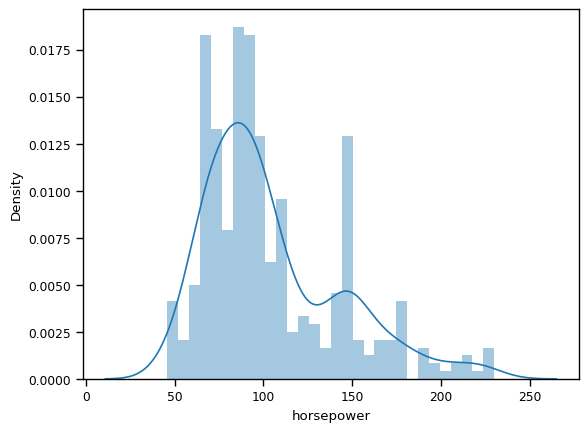

In [95]:
#the graph is right skewed with mean > median. Therefore using median for filling Null values is a good option.
sns.set_context("paper", font_scale = 1)
sns.distplot(df1["horsepower"], bins = 30)
mean = df1["horsepower"].mean()
median = df1["horsepower"].median()
print("The mean is:", mean)
print("The median is:", median)

In [96]:
#Null values handled
df2 = df1.fillna(median)
df2.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [97]:
#Number distinct values in each feature
df2.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
dtype: int64

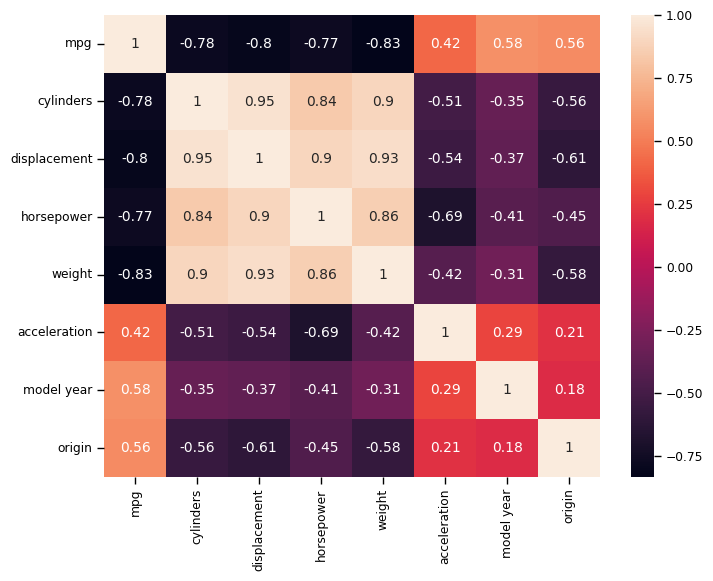

In [98]:
#high correlation between displacement and other features. Can remove displacement
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1,rc={"font.size":10})
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [99]:
# df3 = df2.drop(columns = "displacement")
df3 = df2
df3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [100]:
#working with categorical and numerical data

In [101]:
print("The categorical features are: cylinders, model year, origin; The rest are numerical features")

The categorical features are: cylinders, model year, origin; The rest are numerical features


In [102]:
print("The numerical features are: mpg, horsepower, weight, acceleration, displacement")

The numerical features are: mpg, horsepower, weight, acceleration, displacement


/tmp/ipykernel_40878/256961335.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3["mpg"])
/tmp/ipykernel_40878/256961335.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3["horsepower"])
/tmp/ipykernel_40878/256961335.py:7: UserWarning: 

`distplot` is a deprecated function and will be

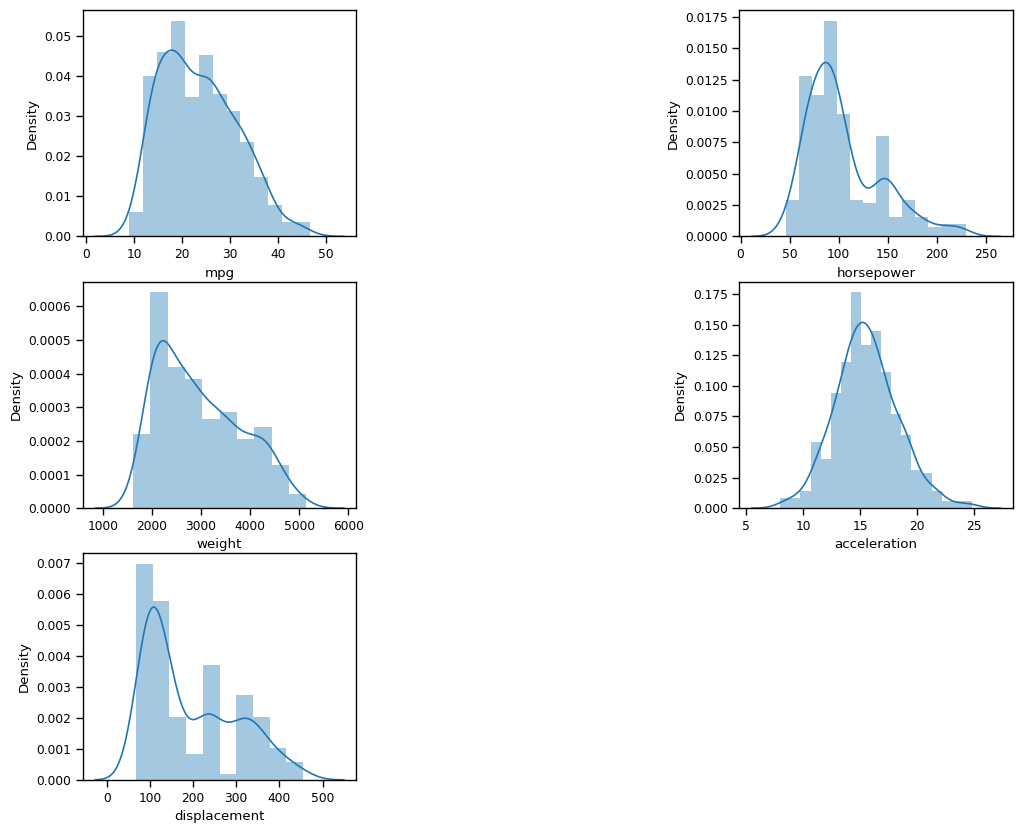

In [103]:
plt.figure(figsize=(12,10))
plt.subplot(3,3,1)
sns.distplot(df3["mpg"])
plt.subplot(3,3,3)
sns.distplot(df3["horsepower"])
plt.subplot(3,3,4)
sns.distplot(df3["weight"])
plt.subplot(3,3,6)
sns.distplot(df3["acceleration"])
plt.subplot(3,3,7)
sns.distplot(df3["displacement"])
plt.show()

In [104]:
#boxplots and handling of outliers

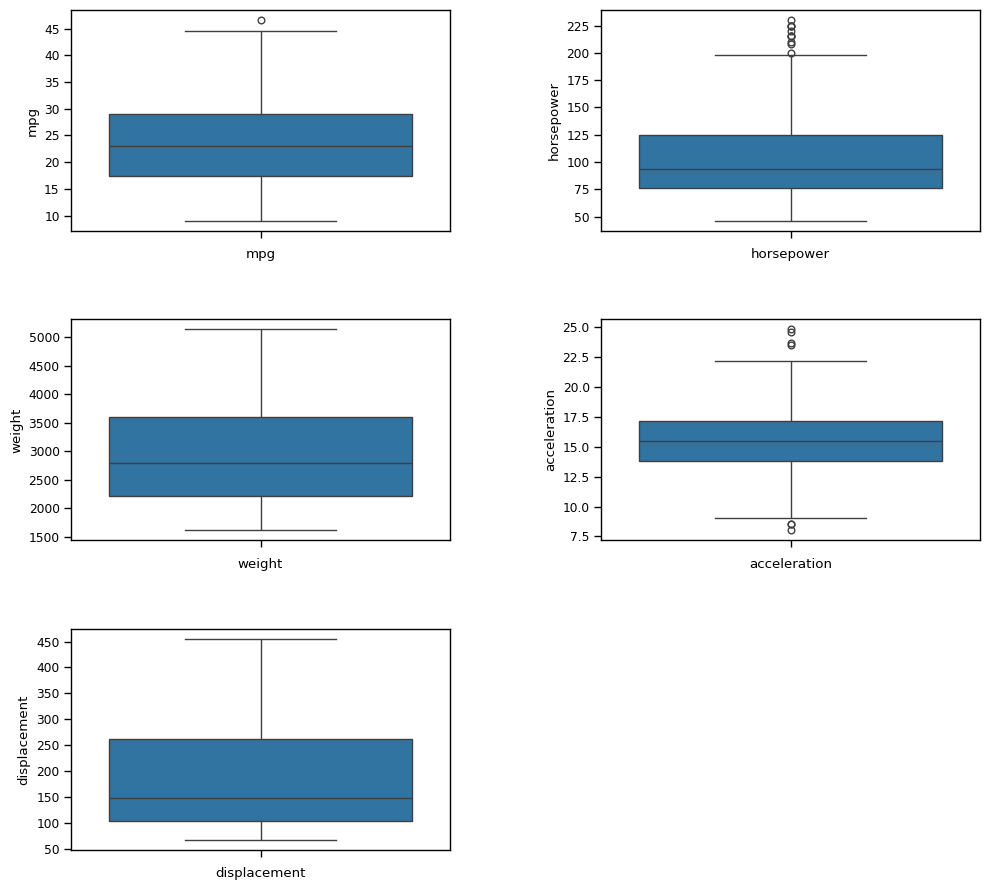

In [105]:
plt.figure(figsize=(10,9))
numerical_features = ["mpg", "horsepower", "weight", "acceleration", "displacement"]
# Iterate over categorical features
for i, j in enumerate(numerical_features):
    ax = plt.subplot(3, 2, i + 1)
    sns.boxplot(df3[j])
    ax.set_xlabel(j)
    plt.tight_layout()
    
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


After removing the outlier in mpg, no of rows in the dataframe is: (397, 8)


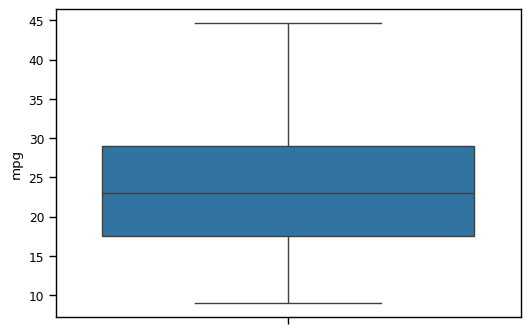

In [106]:
#removing the outlier from mpg
Q1 = df3["mpg"].quantile(0.25)
Q3 = df3["mpg"].quantile(0.75)
IQR = Q3 - Q1
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR
df4 = df3[(df3["mpg"]>=lowerBound) & (df3["mpg"]<=upperBound)]

plt.figure(figsize=(6,4))
sns.boxplot(df4["mpg"])
print("After removing the outlier in mpg, no of rows in the dataframe is:", df4.shape)

In [107]:
#handling of outliers using capping method

In [108]:
def capping_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column]<lowerBound, lowerBound, df[column])
    df[column] = np.where(df[column]>upperBound, upperBound, df[column])
    return df
    

In [109]:
#outliers are capped (outlier value equals lower bound value if it is less than that & it is changed to upper bound value if it is higher than that)



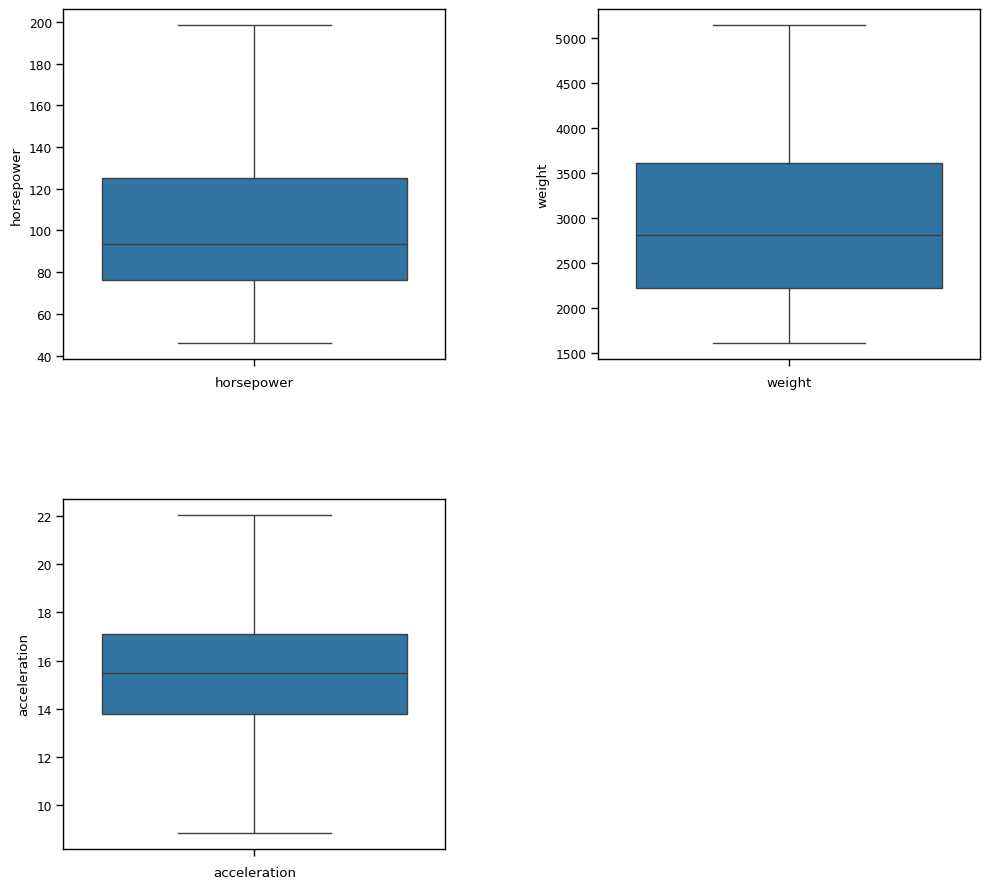

In [110]:
#replication of existing dataframe to work with the outliers
columns = ["horsepower", "weight", "acceleration"]
df5 = df4 
# Q1 = df5["horsepower"].quantile(0.25)
# Q3 = df5["horsepower"].quantile(0.75)
# IQR = Q3 - Q1
# lowerBound = Q1 - 1.5 * IQR
# upperBound = Q3 + 1.5 * IQR
# df5["horsepower"] = np.where(df5["horsepower"]<lowerBound, lowerBound, df5["horsepower"])
# df5["horsepower"] = np.where(df5["horsepower"]>upperBound, upperBound, df5["horsepower"])
for i in range(3):
    df5 = capping_outliers(df5.copy(), columns[i])

# plt.figure(figsize=(6,4))
# sns.boxplot(df5["horsepower"])

plt.figure(figsize=(10,9))
for i, j in enumerate(columns):
    ax = plt.subplot(2, 2, i + 1)
    sns.boxplot(df5[j])
    ax.set_xlabel(j)
    plt.tight_layout()
    
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

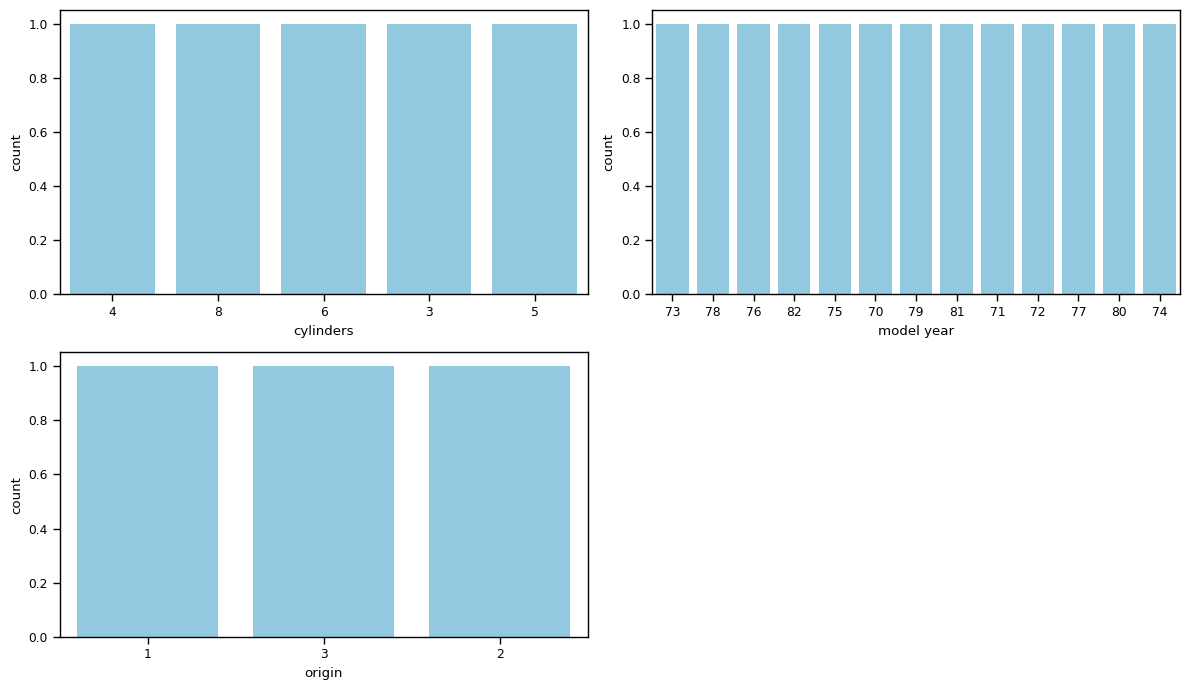

In [111]:
sns.set_context("paper", font_scale=1,rc={"font.size":10})
# plt.figure(figsize=(8,6))
categorical_features = ["cylinders", "model year", "origin"]

fig = plt.figure(figsize=(12, 7))

# Iterate over categorical features
for i, j in enumerate(categorical_features):
    ax = plt.subplot(2, 2, i + 1)
    order = df5[j].value_counts().index 
    sns.countplot(df5[j], order=order, color='skyblue')
    ax.set_xlabel(j)
    plt.tight_layout()

plt.show()

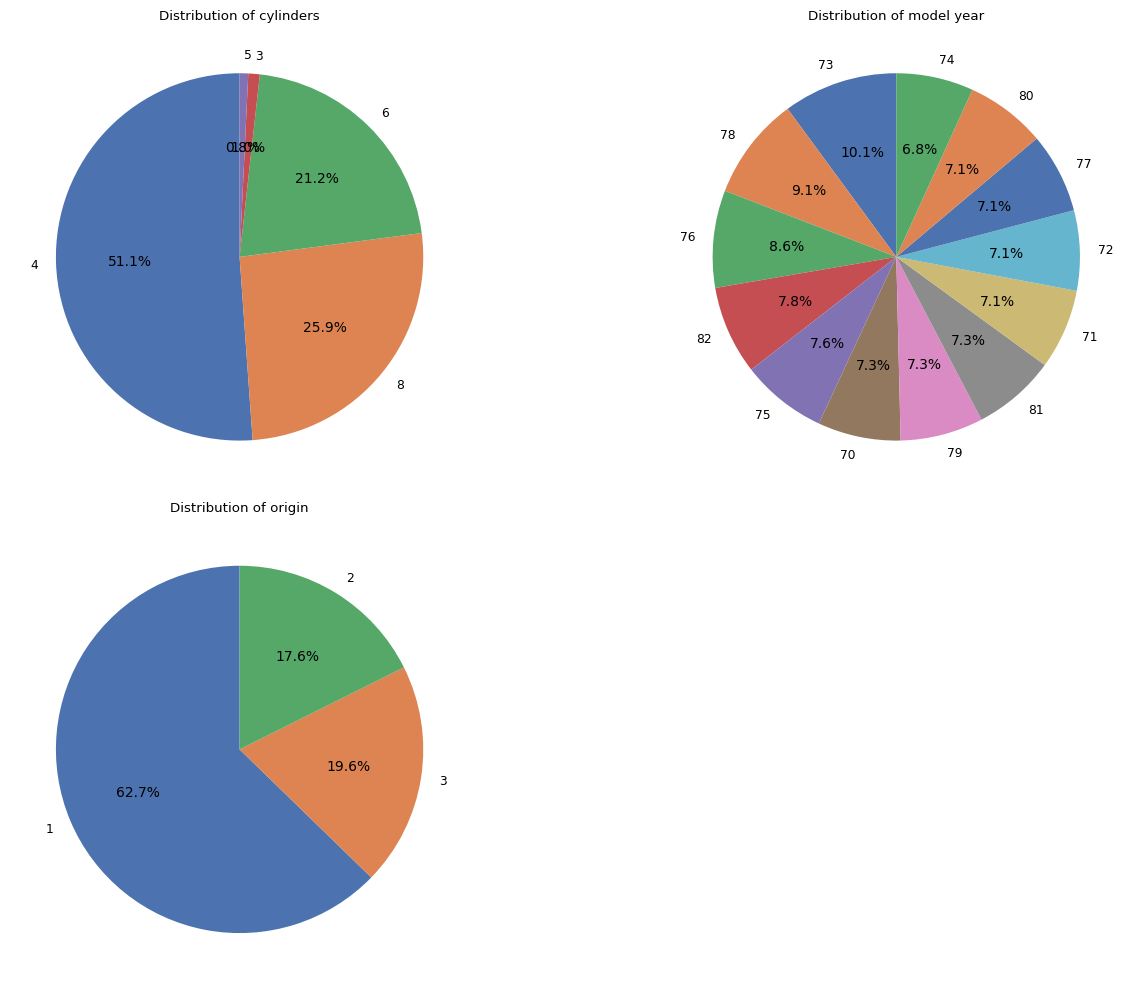

In [112]:
sns.set_context("paper", font_scale=1,rc={"font.size":10})
categorical_features = ["cylinders", "model year", "origin"]

# Increase figure size
fig = plt.figure(figsize=(14, 10))

# Iterate over categorical features and create pie charts
for i, car in enumerate(categorical_features):
    ax = plt.subplot(2, 2, i + 1)
    counts = df5[car].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("deep"))
    ax.set_title(f'Distribution of {car}')

plt.tight_layout()
plt.show()

<Figure size 900x700 with 0 Axes>

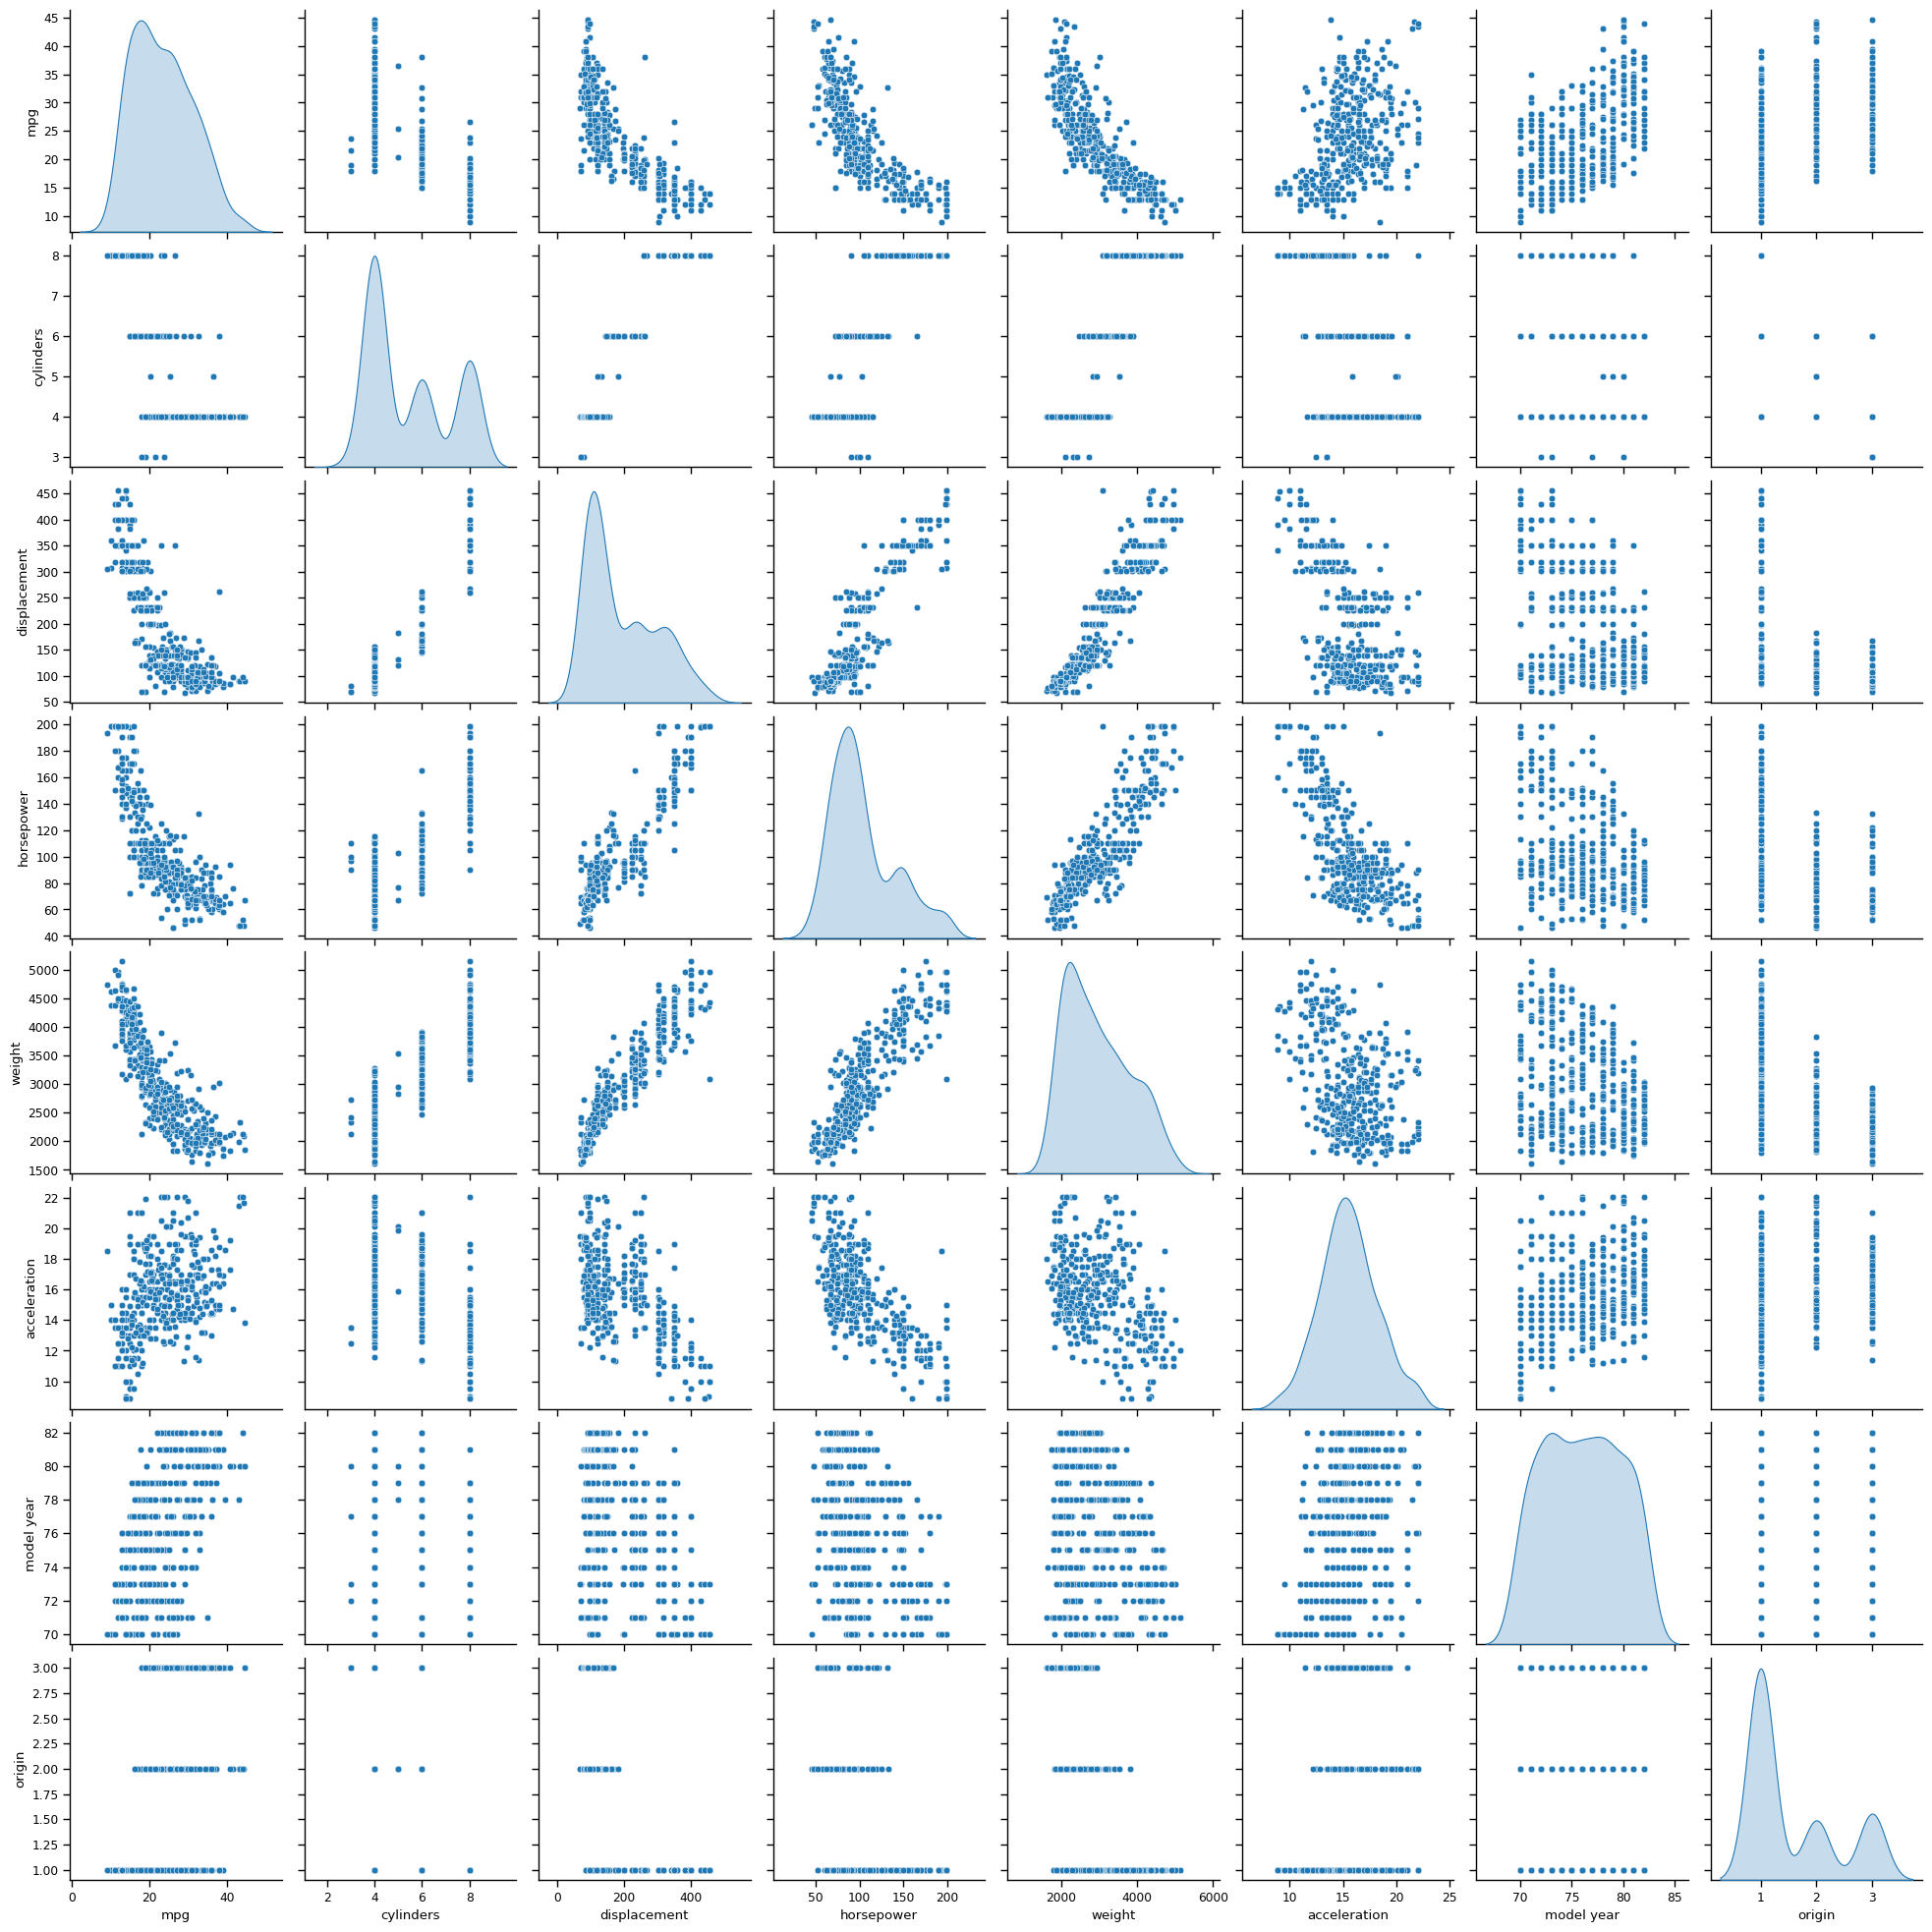

In [113]:
#Identifying trends in the datapoints pairwise, between the dataset features
plt.figure(figsize = (9,7))
sns.pairplot(df5, diag_kind='kde')

In [114]:
print("There is a linear trend between most of the features ")

There is a linear trend between most of the features 


In [115]:
#scaling the numerical features => ("mpg", "horsepower", "weight", "acceleration")


In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [117]:
print(numerical_features)
print(categorical_features)

['mpg', 'horsepower', 'weight', 'acceleration', 'displacement']
['cylinders', 'model year', 'origin']


In [118]:

df5.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [119]:
df6 = pd.DataFrame()
df6["origin"] = df5["origin"]
df6

,origin
0,1
1,1
2,1
3,1
4,1
...,...
393,1
394,2
395,1
396,1


In [120]:
df6 = pd.get_dummies(df6, columns = ["origin"]).astype(int)
df7 = df5
df7 = df7.drop("origin", axis = 1)
df7 = pd.concat([df7, df6], axis=1)

In [121]:
#origin 
# df6 = df5
# df6 = pd.get_dummies(df6, columns = ["origin"]).astype(int)
df7.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [122]:
#scaling -> for the numerical features
scaler = StandardScaler()
# df6 = df5
df7[numerical_features] = scaler.fit_transform(df7[numerical_features])
df7.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,-0.705930,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0
1,-1.094058,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0
2,-0.705930,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0
3,-0.964682,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0
4,-0.835306,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0


In [123]:
#k means clustering

In [124]:
from sklearn.cluster import KMeans

In [125]:
wcss = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df7)
    wcss.append(kmeans.inertia_)  
wcss

/home/suraj/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/suraj/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/suraj/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/suraj/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

[8756.722921914356,
 4297.118507749878,
 2972.1055366044848,
 2191.563311468695,
 1750.3212418655198]

[]

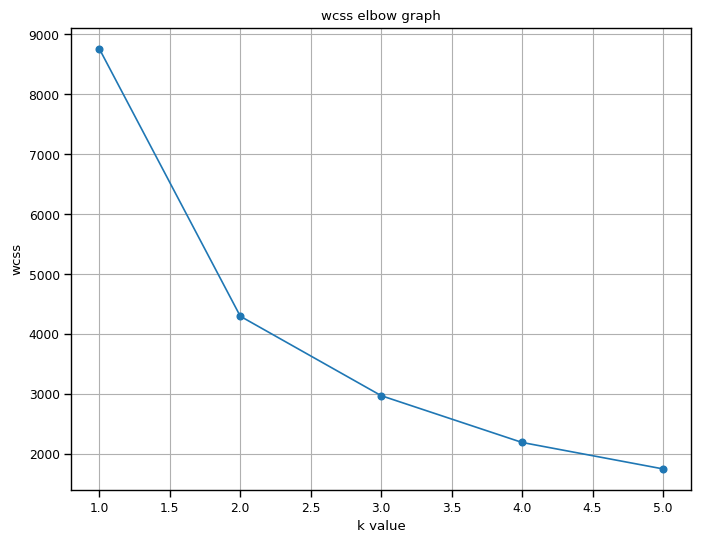

In [126]:
plt.figure(figsize = (8,6))
plt.plot(range(1,6), wcss, marker = 'o')
plt.title('wcss elbow graph')
plt.xlabel('k value')
plt.ylabel('wcss')
plt.grid(True)
plt.plot()

In [127]:
from sklearn.metrics import silhouette_score

In [128]:
#silhouette scoring
silhouette_scores = []

for i in range(2,7):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    klabels = kmeans.fit_predict(df7)
    silhouette_avg = silhouette_score(df7, klabels)
    silhouette_scores.append(silhouette_avg)
silhouette_scores

/home/suraj/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/suraj/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/suraj/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/suraj/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

[0.41479062910455805,
 0.4058784843227215,
 0.40256562958016506,
 0.37457108326682736,
 0.3801805664982056]

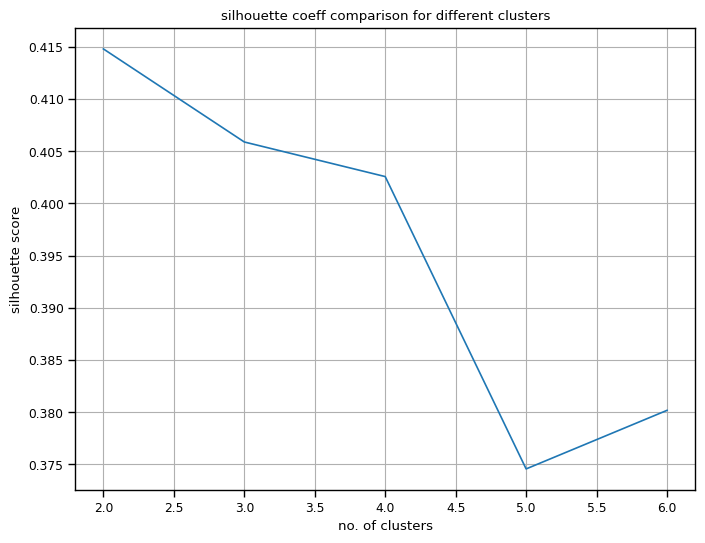

In [129]:
plt.figure(figsize = (8,6))
plt.plot(range(2,7), silhouette_scores)
plt.title("silhouette coeff comparison for different clusters")
plt.xlabel("no. of clusters")
plt.ylabel("silhouette score")
plt.grid(True)
plt.show()

In [130]:
print("suitable k value is 2")

suitable k value is 2


In [131]:
#addition of predicted labels for k=2

kmeans = KMeans(n_clusters = 2, random_state = 0)
klabels = kmeans.fit_predict(df7)
df_kmeans = df7
df_kmeans["kmeans"] = klabels
df_kmeans.head()

/home/suraj/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,kmeans
0,-0.705930,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0,1
1,-1.094058,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0,1
2,-0.705930,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0,1
3,-0.964682,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0,1
4,-0.835306,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0,1


In [132]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    float64
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model year    397 non-null    int64  
 7   origin_1      397 non-null    int64  
 8   origin_2      397 non-null    int64  
 9   origin_3      397 non-null    int64  
 10  kmeans        397 non-null    int32  
dtypes: float64(5), int32(1), int64(5)
memory usage: 35.7 KB


In [133]:
df_kmeans.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin_1', 'origin_2', 'origin_3',
       'kmeans'],
      dtype='object')

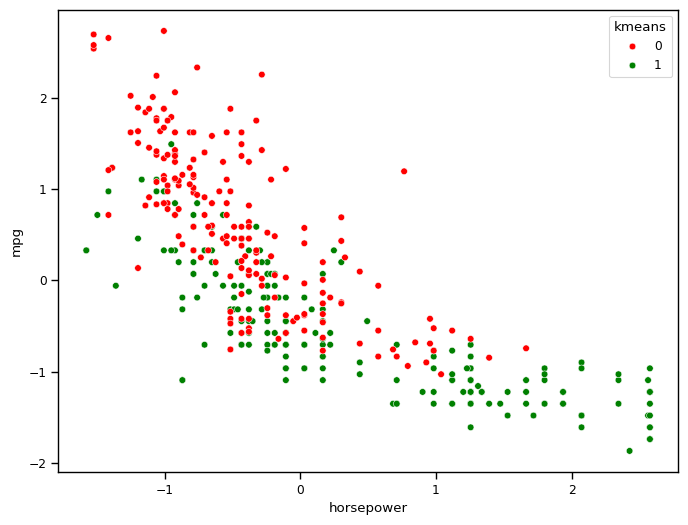

In [134]:
plt.figure(figsize = (8,6))
sns.scatterplot(x="horsepower", y="mpg", hue = "kmeans", data = df_kmeans, palette=['red','green'])
plt.show()

In [135]:
#dbscan clustering


In [136]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [137]:
df7.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,kmeans
0,-0.705930,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0,1
1,-1.094058,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0,1
2,-0.705930,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0,1
3,-0.964682,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0,1
4,-0.835306,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0,1


In [138]:
df7 = df7.drop("kmeans", axis=1)
df7.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,-0.705930,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0
1,-1.094058,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0
2,-0.705930,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0
3,-0.964682,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0
4,-0.835306,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0


In [139]:
#choosing k value = (no.of dimensions+1)
k = 11
nn = NearestNeighbors(n_neighbors = k)
nn_1 = nn.fit(df7)
distances, indices = nn_1.kneighbors(df7)
distances

array([[0.        , 0.60951393, 0.64019099, ..., 1.55893903, 1.65583817,
        1.7440709 ],
       [0.        , 0.67454056, 0.71273263, ..., 1.19318657, 1.27303618,
        1.34815386],
       [0.        , 0.38660652, 0.47316665, ..., 1.55954852, 1.58220177,
        1.64221865],
       ...,
       [0.        , 0.74014284, 1.14582973, ..., 1.74360615, 1.74730786,
        1.76460929],
       [0.        , 0.28815306, 0.45319333, ..., 1.00429439, 1.08746822,
        1.17373031],
       [0.        , 0.45376916, 0.50881171, ..., 1.25319362, 1.29288023,
        1.29351797]])

In [140]:
kdistances = distances[:, k-1]
kdistances = np.sort(kdistances)
kdistances

array([1.00906111, 1.01080041, 1.01763705, 1.01811864, 1.03314424,
       1.03337324, 1.03376928, 1.0392989 , 1.04148526, 1.04541996,
       1.06067259, 1.06193582, 1.06221231, 1.06740348, 1.07232764,
       1.07382787, 1.08172508, 1.08222761, 1.08975714, 1.09046278,
       1.09071133, 1.09921168, 1.11209782, 1.11362675, 1.11393675,
       1.11708807, 1.1229525 , 1.1229525 , 1.13162159, 1.13581492,
       1.14623363, 1.14985687, 1.15112484, 1.15214922, 1.15238623,
       1.15252469, 1.15290339, 1.15882732, 1.16307818, 1.16461884,
       1.16499723, 1.16605471, 1.16663353, 1.16830351, 1.16885201,
       1.17001616, 1.17017002, 1.17373031, 1.17385752, 1.17542766,
       1.18055288, 1.18568252, 1.18873465, 1.19309011, 1.19402245,
       1.19755048, 1.19883487, 1.19917436, 1.2025568 , 1.20362422,
       1.20362422, 1.20365407, 1.20671812, 1.20972122, 1.20972122,
       1.20978379, 1.2099565 , 1.21167418, 1.21786373, 1.21893822,
       1.22562952, 1.23199004, 1.23269376, 1.23637611, 1.23694

In [141]:
len(kdistances)

397

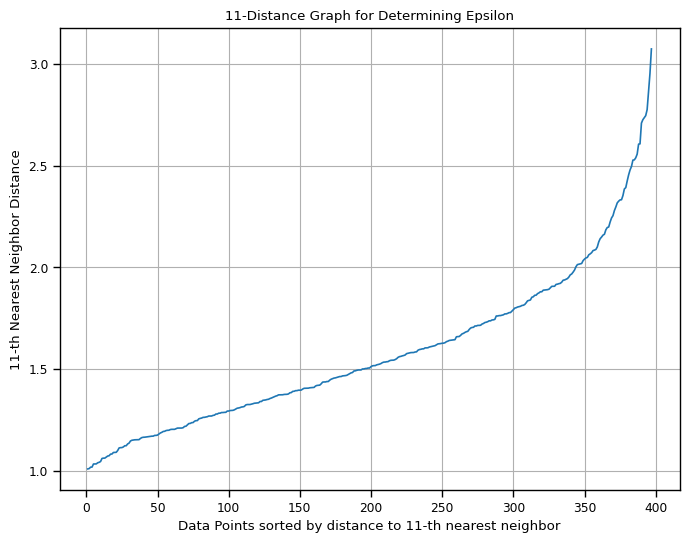

In [142]:
#plotting k distance graph
plt.figure(figsize = (8,6))
plt.plot(range(1, len(kdistances) + 1), kdistances)
plt.xlabel('Data Points sorted by distance to {}-th nearest neighbor'.format(k))
plt.ylabel('{}-th Nearest Neighbor Distance'.format(k))
plt.title('{}-Distance Graph for Determining Epsilon'.format(k))
plt.grid(True)
plt.show()

In [143]:
print("Maximum curvature is observed at epsilon=2")

Maximum curvature is observed at epsilon=2


In [144]:
# epsilon value = 2 and minpoints value is 10
dbscan = DBSCAN(eps = 2, min_samples = 11)
dbscan.fit(df7)

DBSCAN(eps=2, min_samples=11)

In [145]:
df7.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,-0.705930,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0
1,-1.094058,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0
2,-0.705930,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0
3,-0.964682,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0
4,-0.835306,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0


In [146]:
df_dbscan = df7
df_dbscan["dbscan"] = dbscan.labels_
df_dbscan.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,dbscan
0,-0.705930,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0,0
1,-1.094058,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0,0
2,-0.705930,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0,0
3,-0.964682,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0,0
4,-0.835306,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0,0


In [147]:
df_dbscan["dbscan"].value_counts()

dbscan
 1    264
 0    101
-1     20
 2     12
Name: count, dtype: int64

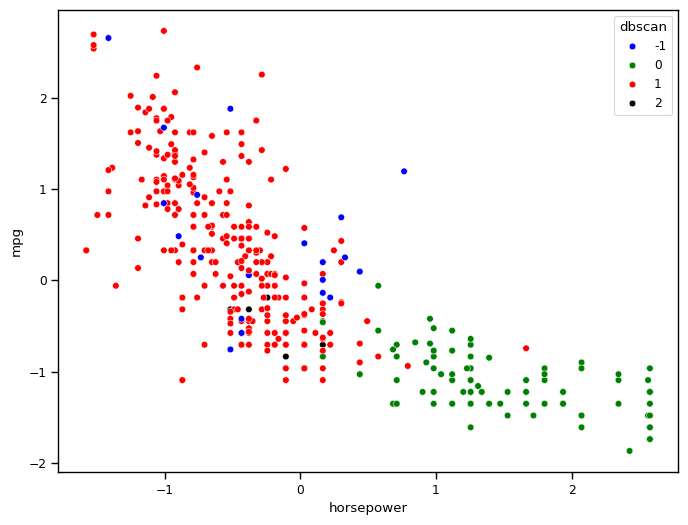

In [148]:
plt.figure(figsize = (8,6))
sns.scatterplot(x="horsepower", y="mpg", hue = "dbscan", data = df_dbscan, palette=['blue', 'green', 'red', 'black'])
plt.show()

In [149]:
df_dbscan.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,dbscan
0,-0.705930,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0,0
1,-1.094058,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0,0
2,-0.705930,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0,0
3,-0.964682,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0,0
4,-0.835306,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0,0


In [150]:
total_high_mpg = df_dbscan[df_dbscan["dbscan"] == 1]["dbscan"].count()
total_high_mpg

264

In [151]:
origin1_high_mpg = df_dbscan.loc[(df_dbscan["dbscan"] == 1) & (df_dbscan["origin_1"] == 1)].shape[0]
origin1_high_mpg

126

([<matplotlib.patches.Wedge at 0x71ad8b667f70>,
 [Text(0.07847312953561776, 1.0971973240675017, 'origin1'),
  Text(-0.07847323226264505, -1.0971973167203122, 'non origin1')])

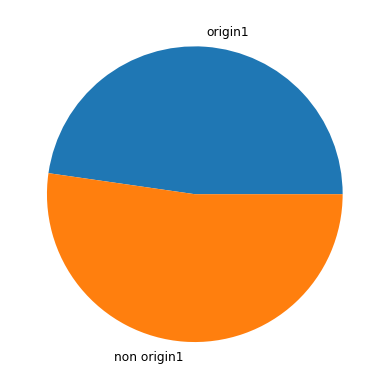

In [152]:
labels = ['origin1', 'non origin1']
sizes = [126, 138]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)


#INFERENCE: almost 50% of the cars that have high mpg is from origin == 1

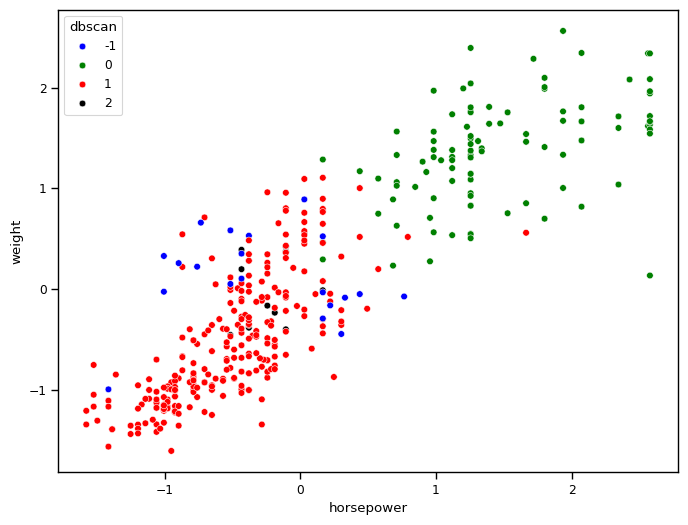

In [153]:
plt.figure(figsize = (8,6))
sns.scatterplot(x="horsepower", y="weight", hue = "dbscan", data = df_dbscan, palette=['blue', 'green', 'red', 'black'])
plt.show()

In [154]:
#horsepower increases -> weight increases -> decreases mpg

#INFERENCE: (i)  Higher horsepower usually means more fuel is being burned => low fuel efficiency (low mpg)
#           (ii) Higher horsepower engines may be heavier due to the larger engine and associated components(cylinders) => require more 
#                energy to move => low fuel efficiency (low mpg)

In [155]:
#Comparison of models trained with : original dataset, kmeans and dbscan modified datasets

In [156]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split

In [157]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score
def evaluationmetrics(y_test,y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred)) 
    print("Precision Score: ", precision_score(y_test, y_pred)) 
    print("Recall Score: ", recall_score(y_test, y_pred)) 
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    return 

In [158]:
#original dataset

In [159]:
df7 = df7.drop("dbscan", axis=1)
df7.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,-0.705930,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0
1,-1.094058,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0
2,-0.705930,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0
3,-0.964682,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0
4,-0.835306,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0


In [160]:
X = df7.drop("mpg", axis=1)
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0
1,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0
2,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0
3,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0
4,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,4,-0.515668,-0.487160,-0.215897,0.020837,82,1,0,0
394,4,-0.928613,-1.413117,-0.996281,2.424234,82,0,1,0
395,4,-0.563685,-0.541628,-0.801185,-1.469642,82,1,0,0
396,4,-0.707735,-0.677798,-0.410993,1.138696,82,1,0,0


In [161]:
Y = pd.DataFrame(df7["mpg"], columns = ["mpg"])
# Y = df7[["mpg"]]
Y

,mpg
0,-0.705930
1,-1.094058
2,-0.705930
3,-0.964682
4,-0.835306
...,...
393,0.458454
394,2.657845
395,1.105333
396,0.587830


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [163]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
229,8,1.981211,2.072839,1.474936,-1.655952,77,1,0,0
179,4,-0.698132,-0.160352,-0.032625,-0.389045,75,0,1,0
140,8,1.059287,1.255818,1.518685,-0.016425,74,1,0,0
22,4,-0.861389,-0.242054,-0.706593,0.728814,70,0,1,0
249,8,0.636738,0.166457,0.463983,-0.016425,78,1,0,0
...,...,...,...,...,...,...,...,...,...
324,4,-1.043854,-1.059075,-1.019929,1.362268,80,0,0,1
192,6,0.540704,0.030287,0.449795,-0.389045,76,1,0,0
117,4,-1.207111,-1.494819,-1.307252,1.474054,73,0,1,0
47,6,0.540704,-0.105883,0.365844,-0.202735,71,1,0,0


In [164]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
65,8,1.510646,1.337520,1.367337,-0.947975,72,1,0,0
132,4,-0.515668,-0.786734,-0.509132,0.542504,74,1,0,0
74,8,1.040080,0.983478,1.562433,0.169885,72,1,0,0
78,4,-0.707735,-0.459926,0.007577,1.474054,72,0,1,0
37,6,0.367843,-0.105883,0.372939,-0.016425,71,1,0,0
...,...,...,...,...,...,...,...,...,...
235,4,-0.928613,-0.786734,-0.836657,0.989648,77,0,0,1
298,8,1.501042,0.574967,1.096568,0.691552,79,1,0,0
92,8,1.510646,1.473690,1.644019,-0.947975,73,1,0,0
220,4,-1.043854,-0.922904,-1.215025,0.467980,77,0,0,1


In [165]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [166]:
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

0.8263005442851233
0.8261366231986761


In [167]:
df7.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin_1', 'origin_2', 'origin_3'],
      dtype='object')

In [168]:
#kmeans dataset
df_kmeans

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,kmeans
0,-0.705930,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0,1
1,-1.094058,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0,1
2,-0.705930,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0,1
3,-0.964682,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0,1
4,-0.835306,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,0.458454,4,-0.515668,-0.487160,-0.215897,0.020837,82,1,0,0,0
394,2.657845,4,-0.928613,-1.413117,-0.996281,2.424234,82,0,1,0,0
395,1.105333,4,-0.563685,-0.541628,-0.801185,-1.469642,82,1,0,0,0
396,0.587830,4,-0.707735,-0.677798,-0.410993,1.138696,82,1,0,0,0


In [169]:
X = df_kmeans.drop("mpg", axis=1)
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,kmeans
0,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0,1
1,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0,1
2,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0,1
3,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0,1
4,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,4,-0.515668,-0.487160,-0.215897,0.020837,82,1,0,0,0
394,4,-0.928613,-1.413117,-0.996281,2.424234,82,0,1,0,0
395,4,-0.563685,-0.541628,-0.801185,-1.469642,82,1,0,0,0
396,4,-0.707735,-0.677798,-0.410993,1.138696,82,1,0,0,0


In [170]:
Y = pd.DataFrame(df_kmeans["mpg"], columns = ["mpg"])
Y

,mpg
0,-0.705930
1,-1.094058
2,-0.705930
3,-0.964682
4,-0.835306
...,...
393,0.458454
394,2.657845
395,1.105333
396,0.587830


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [172]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,kmeans
229,8,1.981211,2.072839,1.474936,-1.655952,77,1,0,0,1
179,4,-0.698132,-0.160352,-0.032625,-0.389045,75,0,1,0,1
140,8,1.059287,1.255818,1.518685,-0.016425,74,1,0,0,1
22,4,-0.861389,-0.242054,-0.706593,0.728814,70,0,1,0,1
249,8,0.636738,0.166457,0.463983,-0.016425,78,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
324,4,-1.043854,-1.059075,-1.019929,1.362268,80,0,0,1,0
192,6,0.540704,0.030287,0.449795,-0.389045,76,1,0,0,1
117,4,-1.207111,-1.494819,-1.307252,1.474054,73,0,1,0,1
47,6,0.540704,-0.105883,0.365844,-0.202735,71,1,0,0,1


In [173]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [174]:
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

0.8263899780786774
0.8271186088826021


In [175]:
#dbscan dataset
df_dbscan

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,dbscan
0,-0.705930,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0,0
1,-1.094058,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0,0
2,-0.705930,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0,0
3,-0.964682,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0,0
4,-0.835306,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,0.458454,4,-0.515668,-0.487160,-0.215897,0.020837,82,1,0,0,1
394,2.657845,4,-0.928613,-1.413117,-0.996281,2.424234,82,0,1,0,-1
395,1.105333,4,-0.563685,-0.541628,-0.801185,-1.469642,82,1,0,0,1
396,0.587830,4,-0.707735,-0.677798,-0.410993,1.138696,82,1,0,0,1


In [176]:
df_dbscan_new = df_dbscan
df_dbscan_new['dbscan']=df_dbscan_new['dbscan'].astype('category')
df_dbscan_new['dbscan'] = df_dbscan_new['dbscan'].replace({-1: 'noise', 0: 'wt_high', 1: 'wt_less', 2:'wt_mid'})
df_dbscan_new = pd.get_dummies(df_dbscan_new, columns=['dbscan'], dtype = int)

In [177]:
df_dbscan_new

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,dbscan_noise,dbscan_wt_high,dbscan_wt_less,dbscan_wt_mid
0,-0.705930,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0,0,1,0,0
1,-1.094058,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0,0,1,0,0
2,-0.705930,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0,0,1,0,0
3,-0.964682,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0,0,1,0,0
4,-0.835306,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.458454,4,-0.515668,-0.487160,-0.215897,0.020837,82,1,0,0,0,0,1,0
394,2.657845,4,-0.928613,-1.413117,-0.996281,2.424234,82,0,1,0,1,0,0,0
395,1.105333,4,-0.563685,-0.541628,-0.801185,-1.469642,82,1,0,0,0,0,1,0
396,0.587830,4,-0.707735,-0.677798,-0.410993,1.138696,82,1,0,0,0,0,1,0


In [178]:
df_dbscan_new[df_dbscan_new["dbscan_wt_mid"] == 1]["weight"].describe()

count    12.000000
mean      0.053789
std       0.370299
min      -0.455924
25%      -0.272061
50%       0.092119
75%       0.377077
max       0.551481
Name: weight, dtype: float64

In [179]:
df_dbscan_new[df_dbscan_new["dbscan_wt_less"] == 1]["weight"].describe()

count    264.000000
mean      -0.532767
std        0.620391
min       -1.607582
25%       -1.002489
50%       -0.679398
75%       -0.119827
max        1.104844
Name: weight, dtype: float64

In [180]:
X = df_dbscan_new.drop("mpg", axis=1)
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,dbscan_noise,dbscan_wt_high,dbscan_wt_less,dbscan_wt_mid
0,8,1.088097,0.711138,0.628337,-1.320594,70,1,0,0,0,1,0,0
1,8,1.501042,1.664329,0.851811,-1.506904,70,1,0,0,0,1,0,0
2,8,1.193734,1.255818,0.547934,-1.693214,70,1,0,0,0,1,0,0
3,8,1.059287,1.255818,0.544387,-1.320594,70,1,0,0,0,1,0,0
4,8,1.040080,0.983478,0.563305,-1.879524,70,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,4,-0.515668,-0.487160,-0.215897,0.020837,82,1,0,0,0,0,1,0
394,4,-0.928613,-1.413117,-0.996281,2.424234,82,0,1,0,1,0,0,0
395,4,-0.563685,-0.541628,-0.801185,-1.469642,82,1,0,0,0,0,1,0
396,4,-0.707735,-0.677798,-0.410993,1.138696,82,1,0,0,0,0,1,0


In [181]:
Y = pd.DataFrame(df_dbscan_new["mpg"], columns = ["mpg"])
Y

,mpg
0,-0.705930
1,-1.094058
2,-0.705930
3,-0.964682
4,-0.835306
...,...
393,0.458454
394,2.657845
395,1.105333
396,0.587830


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [183]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,dbscan_noise,dbscan_wt_high,dbscan_wt_less,dbscan_wt_mid
229,8,1.981211,2.072839,1.474936,-1.655952,77,1,0,0,0,1,0,0
179,4,-0.698132,-0.160352,-0.032625,-0.389045,75,0,1,0,0,0,1,0
140,8,1.059287,1.255818,1.518685,-0.016425,74,1,0,0,0,1,0,0
22,4,-0.861389,-0.242054,-0.706593,0.728814,70,0,1,0,0,0,1,0
249,8,0.636738,0.166457,0.463983,-0.016425,78,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,4,-1.043854,-1.059075,-1.019929,1.362268,80,0,0,1,0,0,1,0
192,6,0.540704,0.030287,0.449795,-0.389045,76,1,0,0,0,0,1,0
117,4,-1.207111,-1.494819,-1.307252,1.474054,73,0,1,0,0,0,1,0
47,6,0.540704,-0.105883,0.365844,-0.202735,71,1,0,0,0,0,0,1


In [196]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,dbscan_noise,dbscan_wt_high,dbscan_wt_less,dbscan_wt_mid
65,8,1.510646,1.337520,1.367337,-0.947975,72,1,0,0,0,1,0,0
132,4,-0.515668,-0.786734,-0.509132,0.542504,74,1,0,0,0,0,1,0
74,8,1.040080,0.983478,1.562433,0.169885,72,1,0,0,0,1,0,0
78,4,-0.707735,-0.459926,0.007577,1.474054,72,0,1,0,0,0,1,0
37,6,0.367843,-0.105883,0.372939,-0.016425,71,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,4,-0.928613,-0.786734,-0.836657,0.989648,77,0,0,1,0,0,1,0
298,8,1.501042,0.574967,1.096568,0.691552,79,1,0,0,0,1,0,0
92,8,1.510646,1.473690,1.644019,-0.947975,73,1,0,0,0,1,0,0
220,4,-1.043854,-0.922904,-1.215025,0.467980,77,0,0,1,0,0,1,0


In [184]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [185]:
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

0.8372060621387832
0.8479749856070324


In [186]:
ridgereg = Ridge()
ridgereg.fit(X_train, y_train)

Ridge()

In [187]:
print(ridgereg.score(X_train, y_train))
print(ridgereg.score(X_test, y_test))

0.8369928178797105
0.8492095256511114


In [217]:
#saving the best model
import joblib, pickle
joblib.dump(ridgereg, "car_mpg.pkl")
with open('car_mpg.pkl', 'wb') as file:
    pickle.dump(model, file)
print("stored successfully")

stored successfully


In [219]:
#checking the dumped model 
import joblib
best = joblib.load("car_mpg.pkl")
best.score(X_test, y_test)

0.8492095256511114

In [220]:
X_test.iloc[0]

cylinders          8.000000
displacement       1.510646
horsepower         1.337520
weight             1.367337
acceleration      -0.947975
model year        72.000000
origin_1           1.000000
origin_2           0.000000
origin_3           0.000000
dbscan_noise       0.000000
dbscan_wt_high     1.000000
dbscan_wt_less     0.000000
dbscan_wt_mid      0.000000
Name: 65, dtype: float64

In [221]:
y_test.iloc[0]

mpg   -1.223434
Name: 65, dtype: float64

In [222]:
model = best
int_features = [8,1.5,1.3,1.36,-0.94,72,1,0,0,0,1,0,0]
final_features = [np.array(int_features)]
prediction = model.predict(final_features)
print(prediction[0])

[-1.27949726]


/home/suraj/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
